In [335]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from pylab import*
import seaborn as sns

In [336]:
ruta="C:/Users/DELL/Documentos 2/Seminario Rodrigo/Proyecto/"
base="ini_final.csv"
bd=pd.read_csv(ruta+base)
bd.Comp_final=bd.Comp_final.replace((0,1),(1,0))

In [337]:
bd.head()

,Unnamed: 0,comp_interno1,comp_interno2,comp_interno4,categoria1,categoria3,comp_mixto1,comp_externo1,comp_externo2,comp_externo3,Comp_final
0,1,0.000000,1,45,1,173,0.33334,40.579710,2.872738,62.0,0
1,2,0.000000,1,45,1,170,0.29186,NaN,NaN,119.0,0
2,3,0.000000,1,59,3,159,0.29112,349.275362,34.616490,94.0,0
3,4,2026.342452,1,67,2,146,0.27318,276.811594,27.434645,125.0,0
4,5,3546.099291,1,70,1,160,0.32988,640.579710,63.487504,81.0,0


In [338]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35131 entries, 0 to 35130
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     35131 non-null  int64  
 1   comp_interno1  35131 non-null  float64
 2   comp_interno2  35131 non-null  int64  
 3   comp_interno4  35131 non-null  int64  
 4   categoria1     35131 non-null  int64  
 5   categoria3     35131 non-null  int64  
 6   comp_mixto1    35131 non-null  float64
 7   comp_externo1  33416 non-null  float64
 8   comp_externo2  30826 non-null  float64
 9   comp_externo3  35127 non-null  float64
 10  Comp_final     35131 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 MB


In [271]:
bd['Comp_final'].value_counts(normalize=True)

0    0.811079
1    0.188921
Name: Comp_final, dtype: float64

In [272]:
bd['comp_interno2'].value_counts(normalize=True)

1    0.701546
0    0.298454
Name: comp_interno2, dtype: float64

In [273]:
bd['comp_interno4'].value_counts(normalize=True)

75    0.046882
48    0.039709
51    0.039282
50    0.038883
47    0.038200
49    0.037972
52    0.037915
53    0.036606
46    0.035923
54    0.034585
55    0.033418
45    0.032991
56    0.030827
57    0.030144
58    0.029660
44    0.029575
59    0.027981
60    0.026273
62    0.024964
43    0.024366
61    0.024138
64    0.022971
63    0.021662
74    0.021320
71    0.021292
65    0.020751
66    0.020523
67    0.019726
73    0.019071
72    0.019043
70    0.018502
42    0.018161
68    0.018018
69    0.017791
41    0.013521
40    0.009080
39    0.006405
38    0.003160
37    0.002363
36    0.001651
76    0.001309
35    0.000854
34    0.000655
33    0.000541
32    0.000285
77    0.000285
30    0.000256
31    0.000199
27    0.000171
78    0.000057
29    0.000028
79    0.000028
28    0.000028
Name: comp_interno4, dtype: float64

In [274]:
bd['categoria1'].value_counts(normalize=True)

1    0.455410
2    0.294839
3    0.217472
4    0.017506
6    0.008938
5    0.005835
Name: categoria1, dtype: float64

In [275]:
bd['categoria3'].value_counts(normalize=True)

146    0.145086
164    0.137286
159    0.102758
160    0.076741
156    0.043124
151    0.036122
169    0.035951
170    0.035951
166    0.033446
154    0.033133
167    0.031482
175    0.030173
148    0.025561
147    0.025448
168    0.025220
173    0.021235
176    0.019527
171    0.019299
162    0.017791
161    0.015143
163    0.011187
158    0.010560
155    0.010020
153    0.009621
149    0.008966
152    0.008397
177    0.008027
157    0.007145
172    0.005864
165    0.005095
150    0.003103
174    0.001537
Name: categoria3, dtype: float64

In [276]:
bd['comp_externo3'].value_counts(normalize=True)

-609.0    0.026134
 132.0    0.024767
 128.0    0.020753
 129.0    0.019956
 131.0    0.019216
            ...   
-89.0     0.000028
-76.0     0.000028
 159.0    0.000028
-73.0     0.000028
-80.0     0.000028
Name: comp_externo3, Length: 232, dtype: float64

In [277]:
#Hacemos validación y test
X = bd.iloc[:,1:9].values
y = bd.iloc[:, 10].values

In [278]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [279]:
from optbinning import OptimalBinning

In [280]:
train, test = train_test_split(bd, test_size = 0.30, random_state = 100) 

In [281]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24591 entries, 29340 to 14147
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     24591 non-null  int64  
 1   comp_interno1  24591 non-null  float64
 2   comp_interno2  24591 non-null  int64  
 3   comp_interno4  24591 non-null  int64  
 4   categoria1     24591 non-null  int64  
 5   categoria3     24591 non-null  int64  
 6   comp_mixto1    24591 non-null  float64
 7   comp_externo1  23372 non-null  float64
 8   comp_externo2  21593 non-null  float64
 9   comp_externo3  24588 non-null  float64
 10  Comp_final     24591 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 2.3 MB


In [282]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10540 entries, 11397 to 33289
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     10540 non-null  int64  
 1   comp_interno1  10540 non-null  float64
 2   comp_interno2  10540 non-null  int64  
 3   comp_interno4  10540 non-null  int64  
 4   categoria1     10540 non-null  int64  
 5   categoria3     10540 non-null  int64  
 6   comp_mixto1    10540 non-null  float64
 7   comp_externo1  10044 non-null  float64
 8   comp_externo2  9233 non-null   float64
 9   comp_externo3  10539 non-null  float64
 10  Comp_final     10540 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 988.1 KB


In [283]:
y = train.Comp_final

In [284]:
optb_comp_interno1 = OptimalBinning(name="comp_interno1", dtype="numerical", solver="cp")
optb_comp_interno2 = OptimalBinning(name="comp_interno2", dtype="categorical", solver="mip")
optb_comp_interno4 = OptimalBinning(name="comp_interno4", dtype="categorical", solver="mip")
optb_categoria3 = OptimalBinning(name="categoria3", dtype="categorical", solver="mip")
optb_categoria1 = OptimalBinning(name="categoria1", dtype="categorical", solver="mip")
optb_comp_mixto1 = OptimalBinning(name="comp_mixto1", dtype="numerical", solver="cp")
optb_comp_externo1 = OptimalBinning(name="comp_externo1", dtype="numerical", solver="cp")
optb_comp_externo2 = OptimalBinning(name="comp_externo2", dtype="numerical", solver="cp")
optb_comp_externo3 = OptimalBinning(name="comp_externo3", dtype="numerical", solver="cp")

In [285]:
optb_comp_interno1.fit(train["comp_interno1"].values, y)
optb_comp_interno2.fit(train["comp_interno2"].values, y)
optb_comp_interno4.fit(train["comp_interno4"].values, y)
optb_categoria3.fit(train["categoria3"].values, y)
optb_categoria1.fit(train["categoria1"].values, y)
optb_comp_mixto1.fit(train["comp_mixto1"].values, y)
optb_comp_externo1.fit(train["comp_externo1"].values, y)
optb_comp_externo2.fit(train["comp_externo2"].values, y)
optb_comp_externo3.fit(train["comp_externo3"].values, y)

OptimalBinning(name='comp_externo3')

In [286]:
display("Binning de comp_interno1:",optb_comp_interno1.splits)

'Binning de comp_interno1:'

array([4.56000016e-05, 8.13069916e+02, 1.92350555e+03])

In [287]:
display("Binning de comp_interno2:",optb_comp_interno4.splits)

'Binning de comp_interno2:'

[array([78, 73, 35, 30, 76, 69, 71], dtype=int64),
 array([74, 27, 32, 49], dtype=int64),
 array([41, 47], dtype=int64),
 array([70, 46, 51], dtype=int64),
 array([75, 48, 45], dtype=int64),
 array([63, 52, 67, 33], dtype=int64),
 array([68, 62, 56, 72], dtype=int64),
 array([42, 55], dtype=int64),
 array([54, 59, 58], dtype=int64),
 array([65, 57], dtype=int64),
 array([43, 61, 64], dtype=int64),
 array([53, 60], dtype=int64),
 array([37, 44, 66], dtype=int64),
 array([50, 36, 40, 39, 77, 34, 38, 31, 29], dtype=int64)]

In [288]:
display("Binning de comp_interno4:",optb_comp_interno4.splits)

'Binning de comp_interno4:'

[array([78, 73, 35, 30, 76, 69, 71], dtype=int64),
 array([74, 27, 32, 49], dtype=int64),
 array([41, 47], dtype=int64),
 array([70, 46, 51], dtype=int64),
 array([75, 48, 45], dtype=int64),
 array([63, 52, 67, 33], dtype=int64),
 array([68, 62, 56, 72], dtype=int64),
 array([42, 55], dtype=int64),
 array([54, 59, 58], dtype=int64),
 array([65, 57], dtype=int64),
 array([43, 61, 64], dtype=int64),
 array([53, 60], dtype=int64),
 array([37, 44, 66], dtype=int64),
 array([50, 36, 40, 39, 77, 34, 38, 31, 29], dtype=int64)]

In [289]:
display("Binning de categoria1:",optb_categoria1.splits)

'Binning de categoria1:'

[array([3], dtype=int64),
 array([2, 4, 5], dtype=int64),
 array([1, 6], dtype=int64)]

In [290]:
display("Binning de categoria3:",optb_categoria3.splits)

'Binning de categoria3:'

[array([177, 147, 148], dtype=int64),
 array([161, 164], dtype=int64),
 array([156, 159], dtype=int64),
 array([146, 167], dtype=int64),
 array([163, 170, 176, 171, 153, 165], dtype=int64),
 array([157, 166, 151, 149, 154], dtype=int64),
 array([160], dtype=int64),
 array([169, 173], dtype=int64),
 array([155, 168, 150, 162], dtype=int64),
 array([172, 175, 152, 158, 174], dtype=int64)]

In [291]:
display("Binning de comp_mixto1:",optb_comp_mixto1.splits)

'Binning de comp_mixto1:'

array([0.29051   , 0.30624999, 0.33690999, 0.35999   , 0.36657001])

In [292]:
display("Binning de comp_externo1:",optb_comp_externo1.splits)

'Binning de comp_externo1:'

array([  34.347826  ,  127.99275589,  172.0289917 ,  219.49275208,
        265.9420166 ,  506.18840027, 1114.63769531])

In [293]:
display("Binning de comp_externo2:",optb_comp_externo2.splits)

'Binning de comp_externo2:'

array([ 4.57483482, 12.67854071, 16.65613365, 21.91180706, 27.67882824,
       55.83165741])

In [294]:
display("Binning de comp_externo3:",optb_comp_externo3.splits)

'Binning de comp_externo3:'

array([ 54.5,  63.5,  73.5,  79.5,  98.5, 105.5, 120.5, 124.5, 130.5])

In [295]:
comp_interno1_table = optb_comp_interno1.binning_table
comp_interno2_table = optb_comp_interno2.binning_table
comp_interno4_table = optb_comp_interno4.binning_table
categoria1_table = optb_categoria1.binning_table
categoria3_table = optb_categoria3.binning_table
comp_mixto1_table = optb_comp_mixto1.binning_table
comp_externo1_table = optb_comp_externo1.binning_table
comp_externo2_table = optb_comp_externo2.binning_table
comp_externo3_table = optb_comp_externo3.binning_table

In [296]:
display(comp_interno1_table.build())

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 0.00)",15691,0.638079,12719,2972,0.189408,0.003511,0.000008,9.819941e-07
1,"[0.00, 813.07)",2241,0.091131,1775,466,0.207943,-0.112981,0.001204,1.504400e-04
2,"[813.07, 1923.51)",3428,0.139401,2770,658,0.191949,-0.012953,0.000023,2.935493e-06
3,"[1923.51, inf)",3231,0.131390,2656,575,0.177963,0.079855,0.000817,1.021214e-04
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,24591,1.000000,19920,4671,0.189948,,0.002053,2.564790e-04


In [297]:
display(comp_interno1_table.build())
display(comp_interno2_table.build())
display(comp_interno4_table.build())
display(categoria1_table.build())
display(categoria3_table.build())
display(comp_mixto1_table.build())
display(comp_externo1_table.build())
display(comp_externo2_table.build())
display(comp_externo3_table.build())

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 0.00)",15691,0.638079,12719,2972,0.189408,0.003511,0.000008,9.819941e-07
1,"[0.00, 813.07)",2241,0.091131,1775,466,0.207943,-0.112981,0.001204,1.504400e-04
2,"[813.07, 1923.51)",3428,0.139401,2770,658,0.191949,-0.012953,0.000023,2.935493e-06
3,"[1923.51, inf)",3231,0.131390,2656,575,0.177963,0.079855,0.000817,1.021214e-04
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,24591,1.000000,19920,4671,0.189948,,0.002053,2.564790e-04


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1],17186,0.698874,13931,3255,0.189398,0.003573,0.000009,0.000001
1,[0],7405,0.301126,5989,1416,0.191222,-0.008263,0.000021,0.000003
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,24591,1.000000,19920,4671,0.189948,,0.000030,0.000004


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[78, 73, 35, 30, 76, 69, 71]",1516,0.061649,1295,221,0.145778,0.317752,0.005623,0.000700
1,"[74, 27, 32, 49]",1460,0.059371,1216,244,0.167123,0.155803,0.001372,0.000171
2,"[41, 47]",1262,0.051320,1048,214,0.169572,0.138312,0.000940,0.000117
3,"[70, 46, 51]",2318,0.094262,1912,406,0.175151,0.099201,0.000899,0.000112
4,"[75, 48, 45]",2951,0.120003,2429,522,0.176889,0.087216,0.000888,0.000111
5,"[63, 52, 67, 33]",1944,0.079053,1589,355,0.182613,0.048391,0.000182,0.000023
6,"[68, 62, 56, 72]",2291,0.093164,1852,439,0.191619,-0.010829,0.000011,0.000001
7,"[42, 55]",1271,0.051686,1021,250,0.196696,-0.043274,0.000098,0.000012
8,"[54, 59, 58]",2296,0.093367,1830,466,0.202962,-0.082465,0.000651,0.000081
9,"[65, 57]",1233,0.050140,979,254,0.206002,-0.101154,0.000529,0.000066


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[3],5353,0.217681,4442,911,0.170185,0.133966,0.003746,0.000468
1,"[2, 4, 5]",7839,0.318775,6466,1373,0.175150,0.099208,0.003041,0.000380
2,"[1, 6]",11399,0.463544,9012,2387,0.209404,-0.121831,0.007141,0.000892
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,24591,1.000000,19920,4671,0.189948,,0.013928,0.001740


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[177, 147, 148]",1434,0.058314,1204,230,0.160391,0.204974,0.002296,0.000287
1,"[161, 164]",3732,0.151763,3090,642,0.172026,0.120987,0.002139,0.000267
2,"[156, 159]",3546,0.144199,2931,615,0.173435,0.111126,0.001720,0.000215
3,"[146, 167]",4370,0.177707,3601,769,0.175973,0.093525,0.001510,0.000189
4,"[163, 170, 176, 171, 153, 165]",2484,0.101013,2032,452,0.181965,0.052743,0.000276,0.000035
5,"[157, 166, 151, 149, 154]",2920,0.118743,2329,591,0.202397,-0.078973,0.000759,0.000095
6,[160],1906,0.077508,1503,403,0.211438,-0.134069,0.001451,0.000181
7,"[169, 173]",1428,0.058070,1124,304,0.212885,-0.14273,0.001236,0.000154
8,"[155, 168, 150, 162]",1409,0.057297,1097,312,0.221434,-0.19302,0.002263,0.000282
9,"[172, 175, 152, 158, 174]",1362,0.055386,1009,353,0.259178,-0.400104,0.009971,0.001238


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 0.29)",3077,0.125127,2610,467,0.151771,0.270425,0.008395,0.001046
1,"[0.29, 0.31)",1689,0.068684,1462,227,0.134399,0.41226,0.010222,0.001269
2,"[0.31, 0.34)",4544,0.184783,3735,809,0.178037,0.079353,0.001135,0.000142
3,"[0.34, 0.36)",5281,0.214753,4291,990,0.187464,0.016219,0.000056,0.000007
4,"[0.36, 0.37)",2089,0.084950,1640,449,0.214935,-0.154922,0.002137,0.000267
5,"[0.37, inf)",7911,0.321703,6182,1729,0.218556,-0.176252,0.010543,0.001316
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,24591,1.000000,19920,4671,0.189948,,0.032489,0.004047


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 34.35)",1255,0.051035,939,316,0.251793,-0.361278,0.007411,0.000921
1,"[34.35, 127.99)",5173,0.210362,4046,1127,0.217862,-0.172182,0.006571,0.000820
2,"[127.99, 172.03)",2400,0.097597,1896,504,0.210000,-0.125426,0.001595,0.000199
3,"[172.03, 219.49)",2313,0.094059,1853,460,0.198876,-0.057016,0.000311,0.000039
4,"[219.49, 265.94)",1583,0.064373,1301,282,0.178143,0.07863,0.000388,0.000049
5,"[265.94, 506.19)",5202,0.211541,4342,860,0.165321,0.168807,0.005715,0.000714
6,"[506.19, 1114.64)",4152,0.168842,3481,671,0.161609,0.195955,0.006094,0.000760
7,"[1114.64, inf)",1294,0.052621,1105,189,0.146059,0.315503,0.004736,0.000589
8,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
9,Missing,1219,0.049571,957,262,0.214930,-0.154892,0.001247,0.000156


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 4.57)",1742,0.070839,1318,424,0.243398,-0.316214,0.007781,0.000969
1,"[4.57, 12.68)",4722,0.192021,3677,1045,0.221305,-0.192271,0.007524,0.000939
2,"[12.68, 16.66)",2219,0.090236,1768,451,0.203245,-0.084214,0.000657,0.000082
3,"[16.66, 21.91)",2491,0.101297,2010,481,0.193095,-0.020328,0.000042,0.000005
4,"[21.91, 27.68)",1714,0.069700,1415,299,0.174446,0.10409,0.000731,0.000091
5,"[27.68, 55.83)",4918,0.199992,4118,800,0.162668,0.18816,0.006672,0.000833
6,"[55.83, inf)",3787,0.153999,3218,569,0.150251,0.282284,0.011215,0.001397
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,2998,0.121915,2396,602,0.200801,-0.069053,0.000594,0.000074
Totals,,24591,1.000000,19920,4671,0.189948,,0.035216,0.004391


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 54.50)",4081,0.165955,2967,1114,0.272972,-0.470757,0.042155,0.005221
1,"[54.50, 63.50)",1288,0.052377,963,325,0.252329,-0.364123,0.007732,0.000961
2,"[63.50, 73.50)",1866,0.075881,1416,450,0.241158,-0.304007,0.007678,0.000956
3,"[73.50, 79.50)",1361,0.055345,1048,313,0.229978,-0.241915,0.003483,0.000434
4,"[79.50, 98.50)",4541,0.184661,3663,878,0.193349,-0.02196,0.000090,0.000011
5,"[98.50, 105.50)",1682,0.068399,1377,305,0.181332,0.057,0.000218,0.000027
6,"[105.50, 120.50)",4861,0.197674,4162,699,0.143798,0.333749,0.019788,0.002462
7,"[120.50, 124.50)",1466,0.059615,1307,159,0.108458,0.656234,0.020719,0.002544
8,"[124.50, 130.50)",2131,0.086658,1887,244,0.114500,0.595224,0.025292,0.003116
9,"[130.50, inf)",1311,0.053312,1127,184,0.140351,0.362028,0.006221,0.000773


In [216]:
binning_table = optb.binning_table

NameError: name 'optb' is not defined

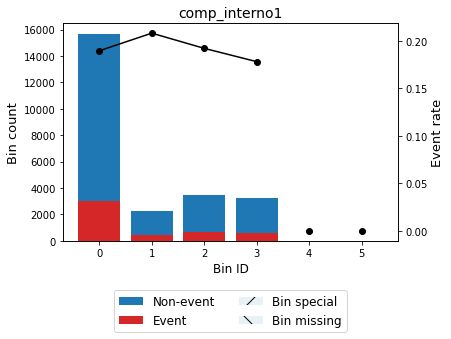

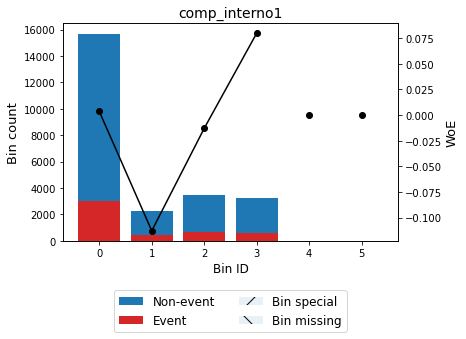

In [30]:
comp_interno1_table.plot(metric="event_rate")
comp_interno1_table.plot(metric="woe")

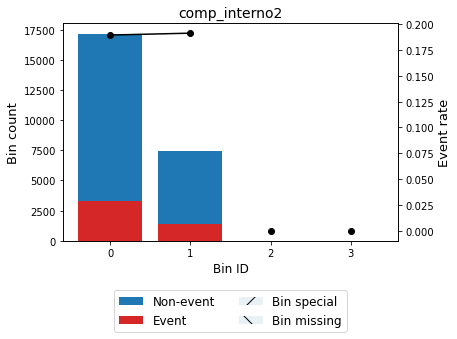

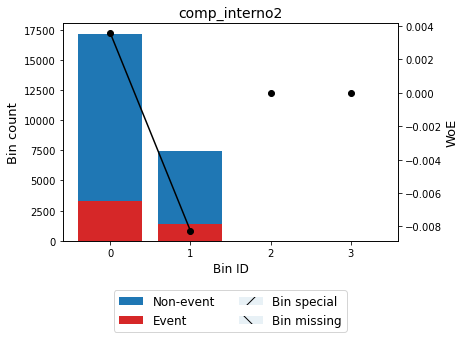

In [230]:
comp_interno2_table.plot(metric="event_rate")
comp_interno2_table.plot(metric="woe")

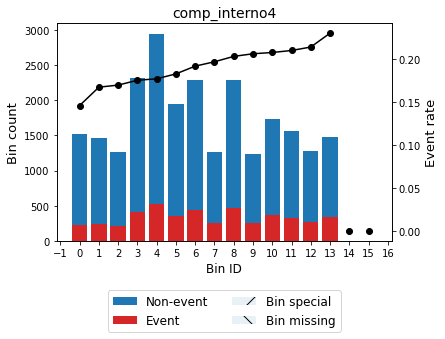

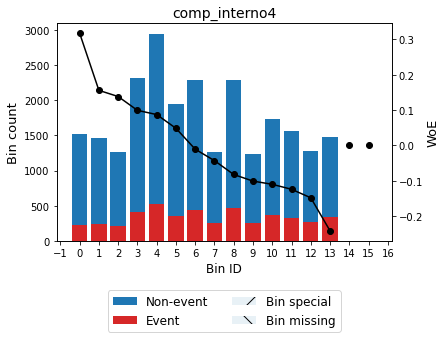

In [39]:
comp_interno4_table.plot(metric="event_rate")
comp_interno4_table.plot(metric="woe")

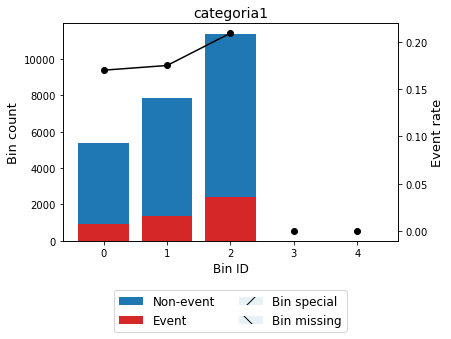

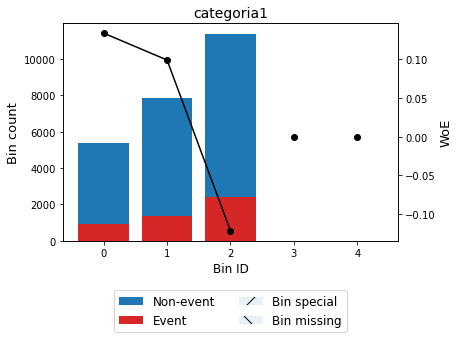

In [231]:
categoria1_table.plot(metric="event_rate")
categoria1_table.plot(metric="woe")

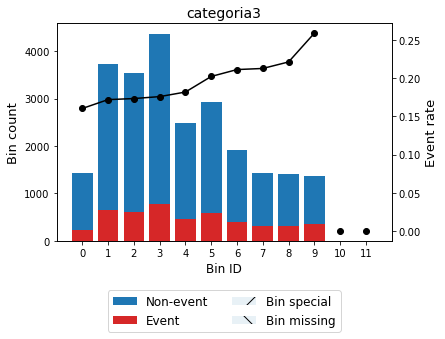

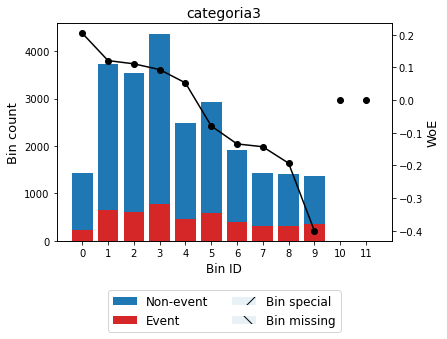

In [40]:
categoria3_table.plot(metric="event_rate")
categoria3_table.plot(metric="woe")

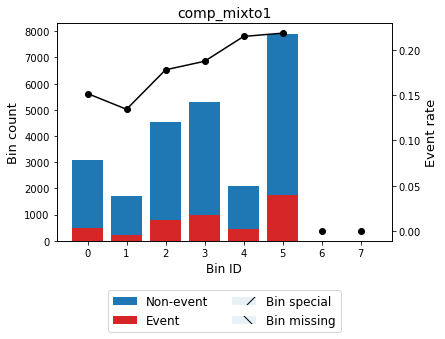

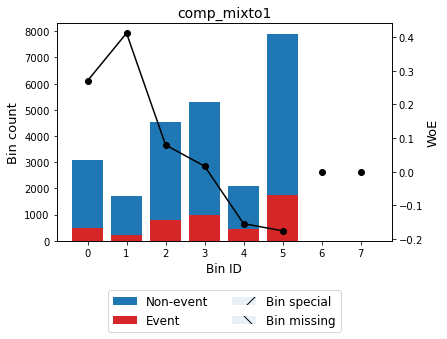

In [41]:
comp_mixto1_table.plot(metric="event_rate")
comp_mixto1_table.plot(metric="woe")

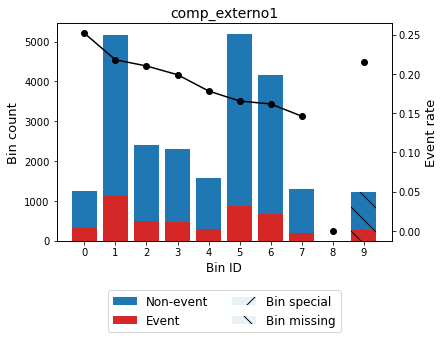

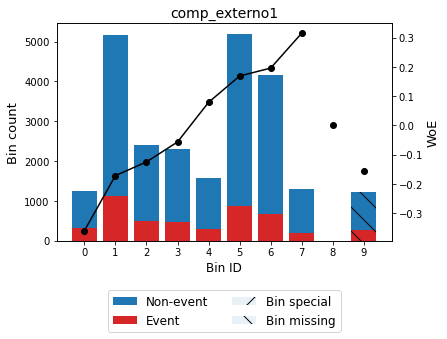

In [42]:
comp_externo1_table.plot(metric="event_rate")
comp_externo1_table.plot(metric="woe")

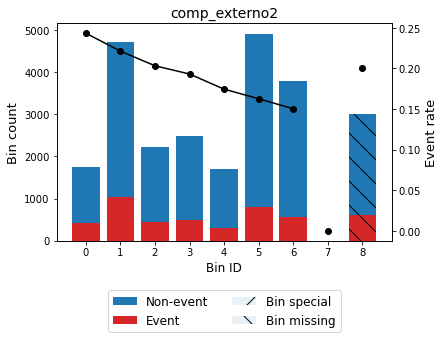

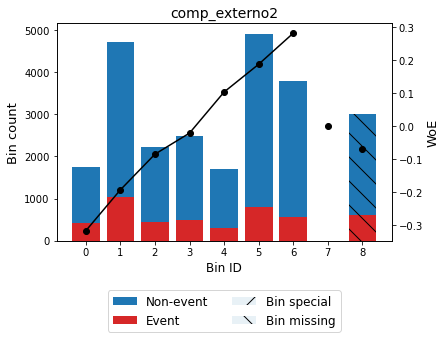

In [43]:
comp_externo2_table.plot(metric="event_rate")
comp_externo2_table.plot(metric="woe")

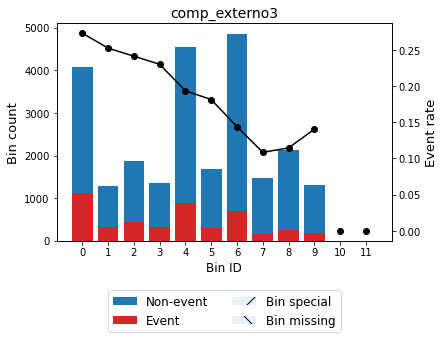

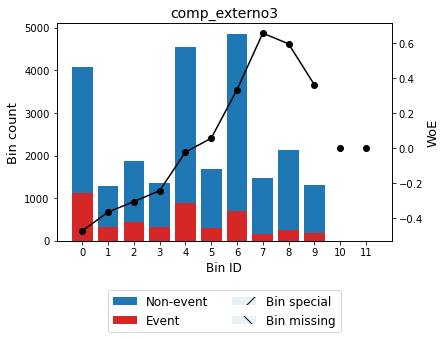

In [44]:
comp_externo3_table.plot(metric="event_rate")
comp_externo3_table.plot(metric="woe")

In [298]:
#Transformamos las variables a woe

train["woe_comp_interno1"] = optb_comp_interno1.transform(train["comp_interno1"], metric="woe")
train["woe_comp_interno2"] = optb_comp_interno4.transform(train["comp_interno2"], metric="woe")
train["woe_comp_interno4"] = optb_comp_interno4.transform(train["comp_interno4"], metric="woe")
train["woe_categoria1"] = optb_categoria1.transform(train["categoria1"], metric="woe")
train["woe_categoria3"] = optb_categoria3.transform(train["categoria3"], metric="woe")
train["woe_comp_mixto1"] = optb_comp_mixto1.transform(train["comp_mixto1"], metric="woe")
train["woe_comp_externo1"] = optb_comp_externo1.transform(train["comp_externo1"], metric="woe")
train["woe_comp_externo2"] = optb_comp_externo2.transform(train["comp_externo2"], metric="woe")
train["woe_comp_externo3"] = optb_comp_externo3.transform(train["comp_externo3"], metric="woe")

In [299]:
train.head()

,Unnamed: 0,comp_interno1,comp_interno2,comp_interno4,categoria1,categoria3,comp_mixto1,comp_externo1,comp_externo2,comp_externo3,Comp_final,woe_comp_interno1,woe_comp_interno2,woe_comp_interno4,woe_categoria3,woe_categoria1,woe_comp_mixto1,woe_comp_externo1,woe_comp_externo2,woe_comp_externo3
29340,41381,1215.805471,1,50,2,166,0.29190,90.463768,8.965814,131.0,0,-0.012953,0.0,-0.241963,-0.078973,0.099208,0.412260,-0.172182,-0.192271,0.362028
11727,16549,0.000000,1,57,2,159,0.34000,236.231884,23.412812,122.0,0,0.003511,0.0,-0.101154,0.111126,0.099208,0.016219,0.078630,0.104090,0.656234
1578,2247,0.000000,1,55,2,146,0.31240,434.779710,42.401609,79.0,0,0.003511,0.0,-0.043274,0.093525,0.099208,0.079353,0.168807,0.188160,-0.241915
11317,15993,0.000000,1,41,1,146,0.31842,220.289855,21.832807,50.0,0,0.003511,0.0,0.138312,0.093525,-0.121831,0.079353,0.078630,-0.020328,-0.470757
29490,41587,0.000000,0,55,1,171,0.37442,162.318841,16.087331,123.0,0,0.003511,0.0,-0.043274,0.052743,-0.121831,-0.176252,-0.125426,-0.084214,0.656234


In [300]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24591 entries, 29340 to 14147
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24591 non-null  int64  
 1   comp_interno1      24591 non-null  float64
 2   comp_interno2      24591 non-null  int64  
 3   comp_interno4      24591 non-null  int64  
 4   categoria1         24591 non-null  int64  
 5   categoria3         24591 non-null  int64  
 6   comp_mixto1        24591 non-null  float64
 7   comp_externo1      23372 non-null  float64
 8   comp_externo2      21593 non-null  float64
 9   comp_externo3      24588 non-null  float64
 10  Comp_final         24591 non-null  int64  
 11  woe_comp_interno1  24591 non-null  float64
 12  woe_comp_interno2  24591 non-null  float64
 13  woe_comp_interno4  24591 non-null  float64
 14  woe_categoria3     24591 non-null  float64
 15  woe_categoria1     24591 non-null  float64
 16  woe_comp_mixto1   

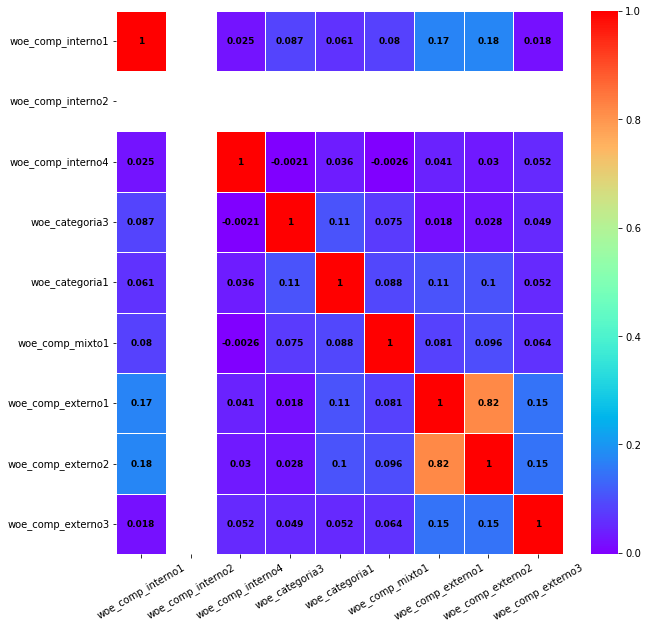

In [301]:
corr = train.iloc[:,11:].corr()


xticks = list(corr.index)  
yticks = list(corr.index)  
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 1, 1)

sns.heatmap(corr,annot=True,cmap="rainbow",ax=ax1,linewidths=.5,annot_kws={'size':9,'weight':'bold', 'color':'k'})
ax1.set_xticklabels(xticks, rotation=30, fontsize=10)
ax1.set_yticklabels(yticks, rotation=0, fontsize=10)
plt.show()

In [304]:
#train=train[["Comp_final","woe_comp_interno1","woe_comp_interno2","woe_comp_interno4","woe_categoria1","woe_categoria3","woe_comp_mixto1","woe_comp_externo1","woe_comp_externo2","woe_comp_externo3"]]

In [302]:
X_woe_train=train.iloc[:,11:]
y_train=train.iloc[:,10]
X_woe_train.head()

,woe_comp_interno1,woe_comp_interno2,woe_comp_interno4,woe_categoria3,woe_categoria1,woe_comp_mixto1,woe_comp_externo1,woe_comp_externo2,woe_comp_externo3
29340,-0.012953,0.0,-0.241963,-0.078973,0.099208,0.412260,-0.172182,-0.192271,0.362028
11727,0.003511,0.0,-0.101154,0.111126,0.099208,0.016219,0.078630,0.104090,0.656234
1578,0.003511,0.0,-0.043274,0.093525,0.099208,0.079353,0.168807,0.188160,-0.241915
11317,0.003511,0.0,0.138312,0.093525,-0.121831,0.079353,0.078630,-0.020328,-0.470757
29490,0.003511,0.0,-0.043274,0.052743,-0.121831,-0.176252,-0.125426,-0.084214,0.656234


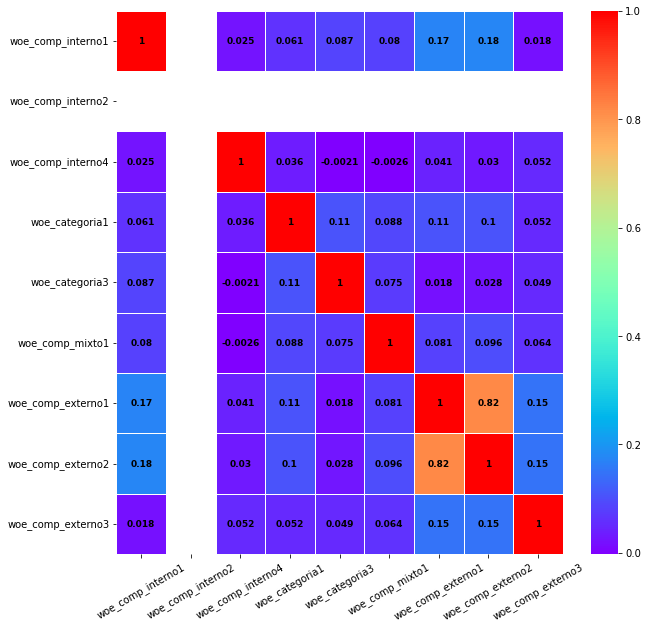

In [305]:
corr = train.iloc[:,1:].corr()
corr

xticks = list(corr.index)  
yticks = list(corr.index)  
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 1, 1)

sns.heatmap(corr,annot=True,cmap="rainbow",ax=ax1,linewidths=.5,annot_kws={'size':9,'weight':'bold', 'color':'k'})
ax1.set_xticklabels(xticks, rotation=30, fontsize=10)
ax1.set_yticklabels(yticks, rotation=0, fontsize=10)
plt.show()

In [428]:
model=LogisticRegression()
clf=model.fit(X_woe_train,y_train)

y_pred
 [0 0 0 ... 0 0 0]
y_pred1
 [-1.74509357 -2.16277512 -1.50153177 ... -0.94362476 -1.47110473
 -0.96039099]


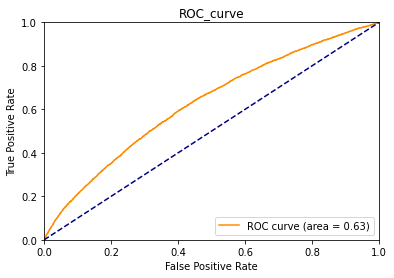

In [307]:
y_pred=clf.predict(X_woe_train)
y_pred1=clf.decision_function(X_woe_train)
print('y_pred\n',y_pred)
print('y_pred1\n',y_pred1)

#Draw ROC curve and calculate AUC value
fpr,tpr,threshold = roc_curve(y_train, y_pred1)
roc_auc = auc(fpr,tpr)
plot(fpr,tpr,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

In [308]:
coe=model.coef_
coe[0]

array([ 0.16441759,  0.        , -0.84160059, -0.78983176, -0.50806175,
       -0.76995639, -0.31049121, -0.38806906, -0.89660714])

In [416]:
#Como las variables woe_interno1 y woe_externo2 tienen mucha correlación con las demás las quitamos
f_train=train[["Comp_final","woe_comp_interno4","woe_categoria3","woe_comp_mixto1","woe_comp_externo1","woe_comp_externo3"]]
X_woe_train=f_train.iloc[:,1:]
y_train=f_train.iloc[:,0]
X_woe_train.head()
model=LogisticRegression()
clf=model.fit(X_woe_train,y_train)

y_pred
 [0 0 0 ... 0 0 0]
y_pred1
 [-1.7201195  -2.11004901 -1.44031833 ... -0.95446316 -1.57048889
 -1.03520453]


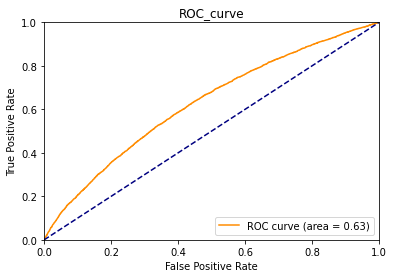

In [310]:
y_pred=clf.predict(X_woe_train)
y_pred1=clf.decision_function(X_woe_train)
print('y_pred\n',y_pred)
print('y_pred1\n',y_pred1)

#Draw ROC curve and calculate AUC value
fpr,tpr,threshold = roc_curve(y_train, y_pred1)
roc_auc = auc(fpr,tpr)
plot(fpr,tpr,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

In [311]:
coe=model.coef_
coe[0]

array([-0.8532767 , -0.83022505, -0.80261421, -0.65079086, -0.90615579])

(array([  1.,   1.,   4.,   0.,   4.,   5.,   5.,   7.,   5.,  16.,  25.,
         31.,  31.,  30.,  46.,  49.,  72.,  85.,  98., 136., 127., 166.,
        167., 190., 213., 254., 298., 245., 324., 365., 301., 394., 372.,
        332., 401., 493., 474., 427., 464., 418., 440., 434., 520., 480.,
        527., 459., 478., 477., 548., 521., 512., 504., 503., 508., 510.,
        575., 491., 488., 499., 505., 512., 528., 511., 538., 464., 466.,
        388., 426., 410., 392., 348., 337., 276., 271., 268., 226., 204.,
        159., 133., 112., 127.,  78.,  86.,  54.,  47.,  46.,  34.,  21.,
         21.,  10.,  15.,   6.,   7.,   1.,   2.,  10.,   1.,   0.,   0.,
          1.]),
 array([-2.93951363, -2.91115315, -2.88279266, -2.85443218, -2.8260717 ,
        -2.79771122, -2.76935074, -2.74099026, -2.71262978, -2.6842693 ,
        -2.65590882, -2.62754834, -2.59918785, -2.57082737, -2.54246689,
        -2.51410641, -2.48574593, -2.45738545, -2.42902497, -2.40066449,
        -2.37230401, -2.34

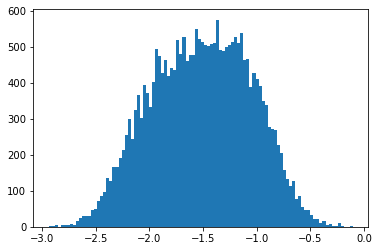

In [312]:
hist(y_pred1,bins=100)

In [249]:
import os
os.getcwd()

'C:\\Users\\DELL\\OneDrive\\Documentos\\Seminario Rodrigo\\Clases Rodrigo\\Códigos de clases'

In [250]:
train.to_csv("bd_train2.csv",index=None)

In [67]:
coe[0][0]

-0.853276702304719

In [417]:
#Según nuestra validación en R es mejor si sacamos la variable woe_comp_externo1 en vez de la variable comp_externo2 por el
#AIC, también el IV de las variables nos sugiere esto pues el IV de comp_externo2 es mayor
#Hagamoslo así entonces:
#Como las variables woe_interno1 y woe_externo2 tienen mucha correlación con las demás las quitamos
f_train=train[["Comp_final","woe_comp_interno2","woe_comp_interno4","woe_categoria1","woe_categoria3","woe_comp_mixto1","woe_comp_externo2","woe_comp_externo3"]]
X_woe_train=f_train.iloc[:,1:]
y_train=f_train.iloc[:,0]
X_woe_train.head()
model=LogisticRegression()
clf=model.fit(X_woe_train,y_train)

y_pred
 [0 0 0 ... 0 0 0]
y_pred1
 [-1.75254307 -2.1665333  -1.49301829 ... -0.94654033 -1.40022274
 -0.9673632 ]


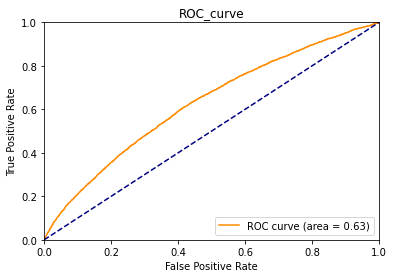

In [418]:
y_pred=clf.predict(X_woe_train)
y_pred1=clf.decision_function(X_woe_train)
print('y_pred\n',y_pred)
print('y_pred1\n',y_pred1)

#Draw ROC curve and calculate AUC value
fpr,tpr,threshold = roc_curve(y_train, y_pred1)
roc_auc = auc(fpr,tpr)
plot(fpr,tpr,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

In [253]:
coe=model.coef_
coe[0]

array([ 0.        , -0.84578039, -0.51690191, -0.78313248, -0.76688383,
       -0.6228398 , -0.9012563 ])

(array([  2.,   0.,   2.,   9.,   2.,   9.,   9.,   5.,  11.,  14.,  15.,
         23.,  44.,  57.,  51.,  60.,  72.,  97., 109., 111., 125., 165.,
        199., 183., 220., 237., 280., 295., 313., 335., 335., 366., 390.,
        418., 423., 393., 408., 460., 476., 433., 459., 437., 478., 502.,
        468., 516., 476., 466., 482., 533., 525., 502., 498., 517., 511.,
        513., 500., 495., 516., 510., 517., 480., 506., 485., 481., 470.,
        435., 402., 397., 389., 335., 338., 281., 275., 262., 239., 193.,
        166., 137., 119., 117.,  93.,  88.,  66.,  54.,  47.,  32.,  32.,
         30.,  20.,  12.,  10.,   3.,   8.,   3.,   0.,   5.,   3.,   0.,
          1.]),
 array([-2.93553884, -2.90726074, -2.87898265, -2.85070456, -2.82242646,
        -2.79414837, -2.76587027, -2.73759218, -2.70931409, -2.68103599,
        -2.6527579 , -2.62447981, -2.59620171, -2.56792362, -2.53964552,
        -2.51136743, -2.48308934, -2.45481124, -2.42653315, -2.39825506,
        -2.36997696, -2.34

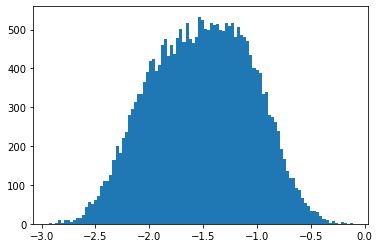

In [254]:
hist(y_pred1,bins=100)

In [313]:
coe=model.coef_
coe

array([[-0.8532767 , -0.83022505, -0.80261421, -0.65079086, -0.90615579]])

In [314]:
model.intercept_

array([-1.44526164])

#¿Qué pasó con el test?  
##Una vez que tenemos la base calificada, pasamos a sacar algunas características de interés

In [315]:
#Obtenemos el predict
y_pr_fit=clf.predict_proba(X_woe_train)
len(y_pr_fit[:,0])

24591

In [316]:
y_pr_fit

array([[0.84814423, 0.15185577],
       [0.89187606, 0.10812394],
       [0.80850394, 0.19149606],
       ...,
       [0.72201187, 0.27798813],
       [0.82785329, 0.17214671],
       [0.73792366, 0.26207634]])

In [317]:
type(y_train)

pandas.core.series.Series

In [318]:
df=y_train.to_frame()
#df["estimado"]=y_pr_fit
#df["estimado"]=y_pr_fit

In [319]:
df["estimado"]=y_pr_fit[:,1]
df

,Comp_final,estimado
29340,0,0.151856
11727,0,0.108124
1578,0,0.191496
11317,0,0.209290
29490,0,0.138992
...,...,...
16734,1,0.261954
16304,0,0.187038
79,0,0.277988
12119,0,0.172147


In [89]:
from pylab import*

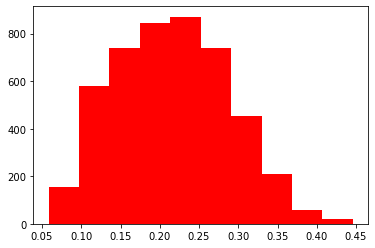

In [90]:
hist(df[df["Comp_final"]==1.0]["estimado"],color="red")
#hist(df[df["Comp_final"]==0.0]["estimado"],color="blue")
show()

KeyError: "None of [Int64Index([0, 0, 0, 0, 0, 1, 1, 0, 0, 0,\n            ...\n            0, 0, 0, 0, 1, 1, 0, 0, 0, 0],\n           dtype='int64', length=24591)] are in the [columns]"

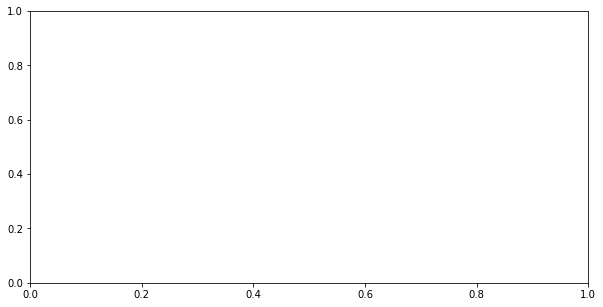

In [109]:
fig, ax=plt.subplots(figsize=(10,5))
hist(df[df["Comp_final"]==1.0]["estimado"],weights=np.ones(len(df[df["Comp_final"]==1.0]["estimado"]))/ len(df[df["Comp_final"]]["estimado"]) ,color="red")
show()

In [320]:
df["Rango_prob"]=pd.qcut(df.estimado, 15)
df.head()

,Comp_final,estimado,Rango_prob
29340,0,0.151856,"(0.15, 0.162]"
11727,0,0.108124,"(0.0982, 0.113]"
1578,0,0.191496,"(0.189, 0.203]"
11317,0,0.209290,"(0.203, 0.218]"
29490,0,0.138992,"(0.137, 0.15]"


In [321]:
df.groupby(['Comp_final', "Rango_prob"]).count()

estimado
Comp_final Rango_prob                
0          (0.0492, 0.0982]      1483
           (0.0982, 0.113]       1443
           (0.113, 0.126]        1453
           (0.126, 0.137]        1431
           (0.137, 0.15]         1406
           (0.15, 0.162]         1398
           (0.162, 0.175]        1364
           (0.175, 0.189]        1356
           (0.189, 0.203]        1320
           (0.203, 0.218]        1297
           (0.218, 0.234]        1276
           (0.234, 0.251]        1243
           (0.251, 0.273]        1218
           (0.273, 0.302]        1192
           (0.302, 0.474]        1040
1          (0.0492, 0.0982]       157
           (0.0982, 0.113]        196
           (0.113, 0.126]         187
           (0.126, 0.137]         208
           (0.137, 0.15]          233
           (0.15, 0.162]          245
           (0.162, 0.175]         272
           (0.175, 0.189]         283
           (0.189, 0.203]         321
           (0.203, 0.218]         341
           (0.218, 0.234]         363
           (0.234, 0.251]         397
           (0.251, 0.273]         421
           (0.273, 0.302]         447
           (0.302, 0.474]         600

In [322]:
#Construcción de Scorecard

In [323]:
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import ks_2samp

In [445]:
#KS
ecdf_malos=ECDF(df.loc[df.Comp_final==1.0,'estimado'])
ecdf_buenos=ECDF(df.loc[df.Comp_final==0.0,'estimado'])
grid_score=np.sort(df.estimado.unique())
prob_acum_buenos=ecdf_buenos(grid_score)
prob_acum_malos=ecdf_malos(grid_score)

In [446]:
abs_dif=np.abs(prob_acum_buenos-prob_acum_malos)
KS=np.max(abs_dif)
KS

0.18818462675364267

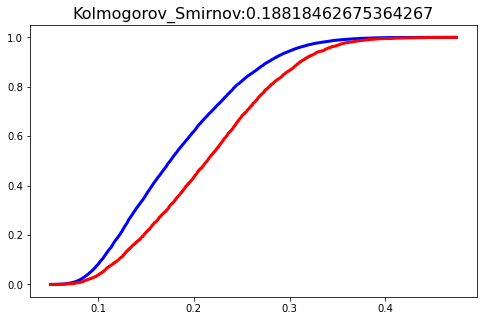

In [326]:
fig, ax=plt.subplots(figsize=(8,5))

ax.set_title(f"Kolmogorov_Smirnov:{KS:}", fontsize=16)
plot(grid_score,prob_acum_buenos, color="blue",linewidth=3)
plot(grid_score,prob_acum_malos, color="red",linewidth=3)
show()

In [327]:
ks_2samp(y_pred,y_train)

KstestResult(statistic=0.1899475417835793, pvalue=0.0)

In [328]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10540 entries, 11397 to 33289
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     10540 non-null  int64  
 1   comp_interno1  10540 non-null  float64
 2   comp_interno2  10540 non-null  int64  
 3   comp_interno4  10540 non-null  int64  
 4   categoria1     10540 non-null  int64  
 5   categoria3     10540 non-null  int64  
 6   comp_mixto1    10540 non-null  float64
 7   comp_externo1  10044 non-null  float64
 8   comp_externo2  9233 non-null   float64
 9   comp_externo3  10539 non-null  float64
 10  Comp_final     10540 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 988.1 KB


In [329]:
y_te=test.Comp_final
y_te

11397    0
34320    0
34034    0
10470    1
32915    1
        ..
10607    0
28824    0
3960     0
18558    0
33289    0
Name: Comp_final, Length: 10540, dtype: int64

In [423]:
optb_comp_interno1.fit(test["comp_interno1"].values, y_te)
optb_comp_interno2.fit(test["comp_interno2"].values, y_te)
optb_comp_interno4.fit(test["comp_interno4"].values, y_te)
optb_categoria1.fit(test["categoria1"].values, y_te)
optb_categoria3.fit(test["categoria3"].values, y_te)
optb_comp_mixto1.fit(test["comp_mixto1"].values, y_te)
optb_comp_externo1.fit(test["comp_externo1"].values, y_te)
optb_comp_externo2.fit(test["comp_externo2"].values, y_te)
optb_comp_externo3.fit(test["comp_externo3"].values, y_te)

OptimalBinning(name='comp_externo3')

In [424]:
#Transformamos las variables a woe para el conjunto de prueba

test["woe_comp_interno1"] = optb_comp_interno1.transform(test["comp_interno1"], metric="woe")
test["woe_comp_interno2"] = optb_comp_interno2.transform(test["comp_interno2"], metric="woe")
test["woe_comp_interno4"] = optb_comp_interno4.transform(test["comp_interno4"], metric="woe")
test["woe_categoria1"] = optb_categoria1.transform(test["categoria1"], metric="woe")
test["woe_categoria3"] = optb_categoria3.transform(test["categoria3"], metric="woe")
test["woe_comp_mixto1"] = optb_comp_mixto1.transform(test["comp_mixto1"], metric="woe")
test["woe_comp_externo1"] = optb_comp_externo1.transform(test["comp_externo1"], metric="woe")
test["woe_comp_externo2"] = optb_comp_externo2.transform(test["comp_externo2"], metric="woe")
test["woe_comp_externo3"] = optb_comp_externo3.transform(test["comp_externo3"], metric="woe")

In [430]:
#Como las variables woe_interno1 y woe_externo1 tienen mucha correlación con las demás las quitamos
f_test=test[["Comp_final","woe_comp_interno2","woe_comp_interno4","woe_categoria1","woe_categoria3","woe_comp_mixto1","woe_comp_externo2","woe_comp_externo3"]]
X_woe_test=f_test.iloc[:,1:]
y_test=f_test.iloc[:,0]
X_woe_test.head()

,woe_comp_interno2,woe_comp_interno4,woe_categoria1,woe_categoria3,woe_comp_mixto1,woe_comp_externo2,woe_comp_externo3
11397,0.003091,0.088502,-0.182524,-0.130927,-0.160304,-0.032154,0.476494
34320,-0.007462,-0.103023,0.262039,0.129954,-0.160304,-0.032154,0.724491
34034,0.003091,0.446697,0.142014,0.129954,0.357247,-0.323349,0.724491
10470,0.003091,-0.237989,-0.182524,-0.130927,0.173580,-0.323349,0.206481
32915,-0.007462,0.088502,0.262039,0.096397,-0.219970,-0.323349,-0.017173


In [436]:
import sklearn.metrics as metrics

In [441]:
def performance_evaluation_report(model, X_test, y_test, show_plot=False, labels=None, show_pr_curve=False):
    '''
    Function for creating a performance report of a classification model.
    
    Parameters
    ----------
    model : scikit-learn estimator
        A fitted estimator for classification problems.
    X_test : pd.DataFrame
        DataFrame with features matching y_test
    y_test : array/pd.Series
        Target of a classification problem.
    show_plot : bool
        Flag whether to show the plot
    labels : list
        List with the class names.
    show_pr_curve : bool
        Flag whether to also show the PR-curve. For this to take effect, 
        show_plot must be True.
        
    Return
    ------
    stats : pd.Series
        A series with the most important evaluation metrics
    '''

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    cm = metrics.confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
    roc_auc = metrics.auc(fpr, tpr)

    precision, recall, thresholds = metrics.precision_recall_curve(
        y_test, y_pred_prob)
    pr_auc = metrics.auc(recall, precision)

    if show_plot:

        if labels is None:
            labels = ['Negative', 'Positive']
            
            N_SUBPLOTS = 3 if show_pr_curve else 2
        PLOT_WIDTH = 15 if show_pr_curve else 12
        PLOT_HEIGHT = 5 if show_pr_curve else 6

        fig, ax = plt.subplots(
            1, N_SUBPLOTS, figsize=(PLOT_WIDTH, PLOT_HEIGHT))
        fig.suptitle('Performance Evaluation', fontsize=16)

        sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='BuGn_r', square=True, cbar=False, ax=ax[0],
                    annot_kws={"ha": 'center', "va": 'center'})
        ax[0].set(xlabel='Predicted label',
                  ylabel='Actual label', title='Confusion Matrix')
        ax[0].xaxis.set_ticklabels(labels)
        ax[0].yaxis.set_ticklabels(labels)

        ax[1].plot(fpr, tpr, 'b-', label=f'ROC-AUC = {roc_auc:.2f}')
        ax[1].set(xlabel='False Positive Rate',
                  ylabel='True Positive Rate', title='ROC Curve')
        ax[1].plot(fp/(fp+tn), tp/(tp+fn), 'ro',
                   markersize=8, label='Decision Point')
        ax[1].plot([0, 1], [0, 1], 'r--')
        ax[1].legend(loc='lower right')

        if show_pr_curve:

            ax[2].plot(recall, precision, label=f'PR-AUC = {pr_auc:.2f}')
            ax[2].set(xlabel='Recall', ylabel='Precision',
                      title='Precision-Recall Curve')
            ax[2].legend()

#         print('#######################')
#         print('Evaluation metrics ####')
#         print('#######################')
#         print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred):.4f}')
#         print(f'Precision: {metrics.precision_score(y_test, y_pred):.4f}')
#         print(f'Recall (Sensitivity): {metrics.recall_score(y_test, y_pred):.4f}')
#         print(f'Specificity: {(tn / (tn + fp)):.4f}')
#         print(f'F1-Score: {metrics.f1_score(y_test, y_pred):.4f}')
#         print(f"Cohen's Kappa: {metrics.cohen_kappa_score(y_test, y_pred):.4f}")

    stats = {'accuracy': metrics.accuracy_score(y_test, y_pred),
             'precision': metrics.precision_score(y_test, y_pred),
             'recall': metrics.recall_score(y_test, y_pred),
             'specificity': (tn / (tn + fp)),
             'f1_score': metrics.f1_score(y_test, y_pred),
             'cohens_kappa': metrics.cohen_kappa_score(y_test, y_pred),
             'roc_auc': roc_auc,
             'pr_auc': pr_auc}

    return stats

{'accuracy': 0.813472485768501,
 'precision': 0.5,
 'recall': 0.002034587995930824,
 'specificity': 0.9995334732913459,
 'f1_score': 0.004052684903748734,
 'cohens_kappa': 0.002544657624557467,
 'roc_auc': 0.6448238553188197,
 'pr_auc': 0.29815125045994717}

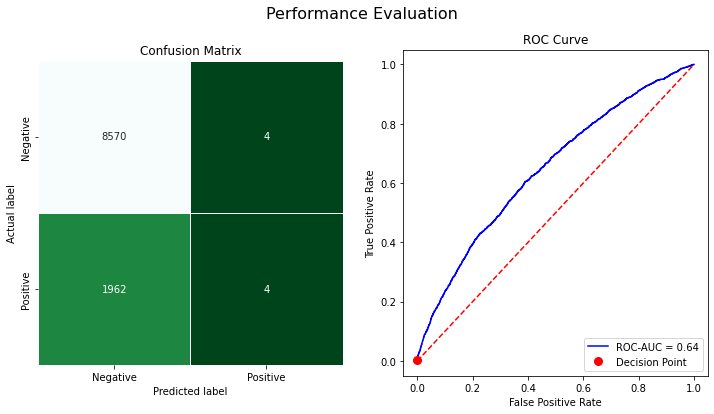

In [454]:
performance_evaluation_report(clf, X_woe_test, y_test,  show_plot=True)

In [421]:
clf

LogisticRegression()

In [426]:
X_woe_test

,woe_comp_interno2,woe_comp_interno4,woe_categoria3,woe_categoria1,woe_comp_mixto1,woe_comp_externo2,woe_comp_externo3
11397,0.003091,0.088502,-0.130927,-0.182524,-0.160304,-0.032154,0.476494
34320,-0.007462,-0.103023,0.129954,0.262039,-0.160304,-0.032154,0.724491
34034,0.003091,0.446697,0.129954,0.142014,0.357247,-0.323349,0.724491
10470,0.003091,-0.237989,-0.130927,-0.182524,0.173580,-0.323349,0.206481
32915,-0.007462,0.088502,0.096397,0.262039,-0.219970,-0.323349,-0.017173
...,...,...,...,...,...,...,...
10607,-0.007462,0.121309,0.497319,-0.182524,0.173580,0.000000,-0.564475
28824,0.003091,0.173912,0.096397,-0.182524,-0.011802,0.185163,0.450954
3960,0.003091,0.121309,0.096397,-0.182524,-0.020982,-0.032154,-0.060833
18558,0.003091,-0.182309,0.129954,0.142014,0.357247,0.162219,0.206481


In [429]:
X_woe_train.head()

,woe_comp_interno2,woe_comp_interno4,woe_categoria1,woe_categoria3,woe_comp_mixto1,woe_comp_externo2,woe_comp_externo3
29340,0.0,-0.241963,0.099208,-0.078973,0.412260,-0.192271,0.362028
11727,0.0,-0.101154,0.099208,0.111126,0.016219,0.104090,0.656234
1578,0.0,-0.043274,0.099208,0.093525,0.079353,0.188160,-0.241915
11317,0.0,0.138312,-0.121831,0.093525,0.079353,-0.020328,-0.470757
29490,0.0,-0.043274,-0.121831,0.052743,-0.176252,-0.084214,0.656234


In [435]:
y_pr = clf.predict(X_woe_test)
y_pr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [443]:
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                                 RandomizedSearchCV,
                                                 cross_validate,
                                                 StratifiedKFold)

In [444]:
from scipy.stats import ks_2samp
Ks=ks_2samp(y_train,y_test)
Ks

KstestResult(statistic=0.0034200275520802625, pvalue=0.9999936967251417)

In [448]:
gini=2*0.6448238553188197-1
gini

0.2896477106376394

In [450]:
k_fold = StratifiedKFold(5, shuffle=True, random_state=42)
cross_validate(clf, X_woe_train, y_train, cv=k_fold,
                           scoring=['accuracy', 'precision', 'recall','roc_auc'])

C:\Users\DELL\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision 

{'fit_time': array([0.32198668, 0.151057  , 0.09864163, 0.10064936, 0.08053684]),
 'score_time': array([0.50328755, 0.09054995, 0.07253146, 0.02015734, 0.02015543]),
 'test_accuracy': array([0.80992072, 0.8100854 , 0.8100854 , 0.8100854 , 0.8100854 ]),
 'test_precision': array([0., 0., 0., 0., 0.]),
 'test_recall': array([0., 0., 0., 0., 0.]),
 'test_roc_auc': array([0.63068584, 0.63102987, 0.6272589 , 0.62352381, 0.62459272])}

In [452]:
LABELS=np.array(["bueno","malo"])

In [458]:
desemp_reglog = performance_evaluation_report(clf, X_woe_test, 
                                             y_test, labels=LABELS, 
                                             show_plot=True)

UnboundLocalError: local variable 'N_SUBPLOTS' referenced before assignment